In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm

In [4]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


In [55]:
gene_symbols = data["gene-symbol"].values

# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

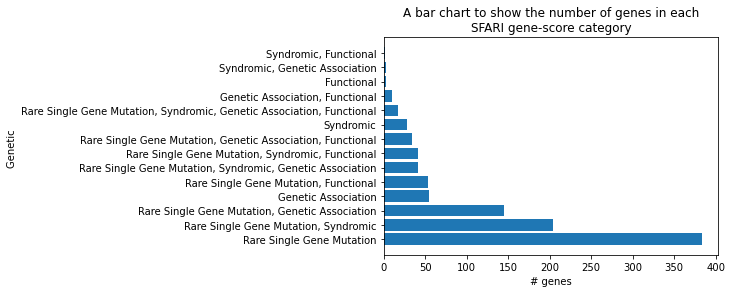

In [5]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

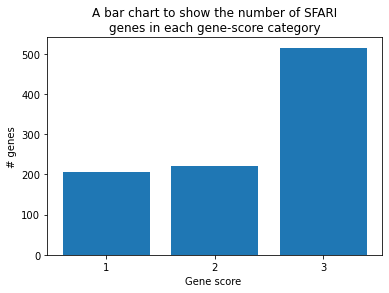

In [65]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

In [61]:
gene_cat_vals

array([ 3.,  2.,  1., nan])

['1.0', '2.0', '3.0', 'nan']


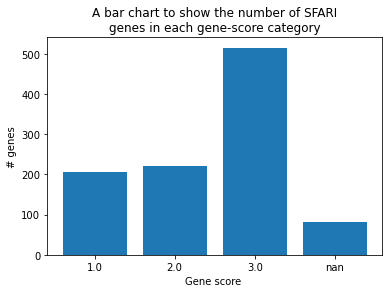

In [83]:
gene_cats_data = data.sort_values("gene-score")['gene-score']
gene_cat_vals = gene_cats_data.unique()
gene_cat_counts = []
for g in gene_cat_vals:
    if np.isnan(g):
        score_indexes = gene_cats_data[gene_cats_data.isnull()].index
    else:
        score_indexes = gene_cats_data[gene_cats_data == g].index
    gene_cat_counts.append(score_indexes.size)
    

A, B = gene_cat_vals.size, len(gene_cat_counts)
assert(A == B)

ticks = np.arange(gene_cat_vals.size)
tick_vals = [str(val) for val in gene_cat_vals]
print(tick_vals)

fig = plt.figure()
plt.bar(ticks, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(ticks, tick_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1-v2.pdf', dpi=fig.dpi)

# task 2

In [6]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [118]:
gs = data["gene-symbol"]
data.iloc[gs[gs == "RP11-1407O15.2"].index[0]]

status                                       9
gene-symbol                     RP11-1407O15.2
gene-name                                  NaN
ensembl-id                                 NaN
chromosome                                  17
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            1
Name: 771, dtype: object

In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

In [ ]:
# This task was completed manually

# task 4

In [82]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [83]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [84]:
year_data2 = []
citation_data = []
pmids = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())
    citation_data.append(gene_data["Citation"].values.size)
    pmids.append(gene_data["PMID"].values.tolist())

In [85]:
gene_data["Citation"]

0     Epilepsia. 2019 Dec;60 Suppl 3:S17-S24. doi: 1...
1     Neuron. 2020 May 6;106(3):421-437.e11. doi: 10...
2     Nature. 2012 Apr 4;485(7397):246-50. doi: 10.1...
3     Nature. 2012 Sep 20;489(7416):385-90. doi: 10....
4     Nat Genet. 2011 Jun;43(6):585-9. doi: 10.1038/...
                            ...                        
63    Pract Neurol. 2017 Aug;17(4):314-317. doi: 10....
64    J Pediatr Neurosci. 2012 May;7(2):123-5. doi: ...
65    J Neurosci. 2004 Mar 17;24(11):2690-8. doi: 10...
66    Gene. 2013 Dec 15;532(2):294-6. doi: 10.1016/j...
67    J Child Neurol. 2004 Aug;19(8):597-603. doi: 1...
Name: Citation, Length: 68, dtype: object

# Task 5

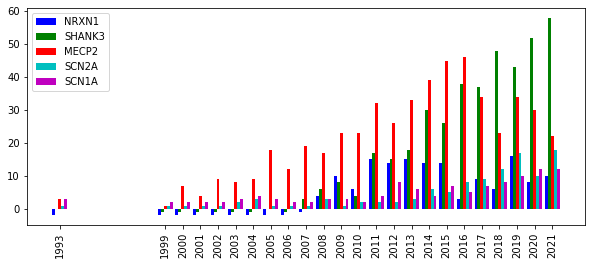

In [14]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

Text(0, 0.5, '# papers published')

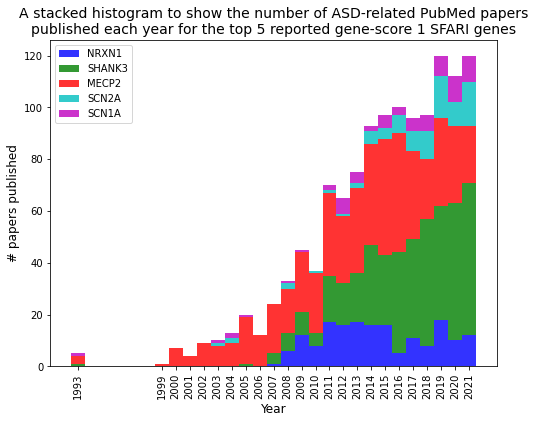

In [96]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=0, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [101]:
year_data2

[[2017,
  2020,
  2008,
  2019,
  2021,
  2017,
  2019,
  2020,
  2019,
  2017,
  2018,
  2013,
  2013,
  2013,
  2014,
  2011,
  2019,
  2012,
  2021,
  2016,
  2019,
  2019,
  2020,
  2018,
  2015,
  2011,
  2009,
  2015,
  2020,
  2012,
  2013,
  2007,
  2012,
  2013,
  2020,
  2020,
  2019,
  2016,
  2009,
  2012,
  2017,
  2010,
  2011,
  2009,
  2011,
  2018,
  2012,
  2021,
  2012,
  2009,
  2011,
  2020,
  2020,
  2019,
  2017,
  2011,
  2010,
  2017,
  2021,
  2012,
  2019,
  2014,
  2014,
  2013,
  2018,
  2012,
  2011,
  2011,
  2010,
  2015,
  2015,
  2013,
  2012,
  2009,
  2012,
  2014,
  2013,
  2015,
  2009,
  2013,
  2019,
  2019,
  2021,
  2019,
  2021,
  2015,
  2015,
  2021,
  2012,
  2012,
  2017,
  2019,
  2014,
  2011,
  2014,
  2009,
  2010,
  2019,
  2014,
  2015,
  2014,
  2019,
  2013,
  2011,
  2014,
  2013,
  2017,
  2015,
  2008,
  2014,
  2021,
  2009,
  2014,
  2008,
  2012,
  2021,
  2010,
  2009,
  2011,
  2015,
  2019,
  2020,
  2016,
  2013,
  2018,


In [89]:
for i in range(5):
    print(len(year_data2[i]))

173
420
517
87
68


In [ ]:
# EXTENSION: plot citations too

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

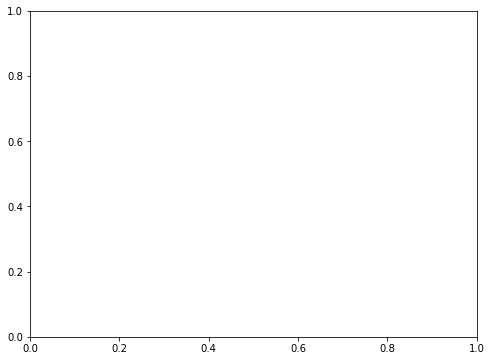

In [41]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(citation_data, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [92]:
Entrez.email = "s1803764@ed.ac.uk"
all_dates = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=1000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    ids = record["IdList"]
    #print(g)
    
    dates = []
    for i in tqdm(ids):
        handle2 = Entrez.esummary(db="pubmed", retmax=1000, id=i)
        meta_data = Entrez.read(handle2)[0]
        #print(meta_data["PubDate"])
        dates.append(meta_data["PubDate"][0:4])

    all_dates.append(dates)

  0%|                                          | 1/1023 [00:01<29:45,  1.75s/it]
0it [00:00, ?it/s]
  0%|                                          | 3/1023 [00:03<22:33,  1.33s/it]
0it [00:00, ?it/s]
  7%|██▉                                       | 59/837 [00:35<07:23,  1.75it/s]


 19%|███████▋                                 | 156/837 [01:33<06:43,  1.69it/s]


 30%|████████████▍                            | 253/837 [02:32<05:48,  1.67it/s]


 42%|█████████████████▏                       | 350/837 [03:30<04:52,  1.67it/s]


 53%|█████████████████████▉                   | 447/837 [04:28<04:40,  1.39it/s]


 65%|██████████████████████████▋              | 544/837 [05:25<02:55,  1.67it/s]


 77%|███████████████████████████████▍         | 641/837 [06:31<02:17,  1.43it/s]


 88%|████████████████████████████████████▏    | 738/837 [07:50<01:21,  1.21it/s]


100%|████████████████████████████████████████▉| 835/837 [08:52<00:01,  1.61it/s]


  1%|▎                                      | 9/1023 [09:19<16:47:45, 59.63s/it]
0it [00:00, ?it/s]
  2%|▋                                      | 19/1023 [09:51<1:20:19,  4.80s/it]
0it [00:00, ?it/s]
  2%|▊                                        | 20/1023 [09:51<58:56,  3.53s/it]
0it [00:00, ?it/s]
  2%|▊                                        | 21/1023 [09:52<44:14,  2.65s/it]
0it [00:00, ?it/s]
  2%|▉                                        | 22/1023 [09:53<33:52,  2.03s/it]
0it [00:00, ?it/s]
  2%|▉                                        | 24/1023 [09:56<31:34,  1.90s/it]
0it [00:00, ?it/s]
  2%|█                                        | 25/1023 [09:56<25:26,  1.53s/it]
0it [00:00, ?it/s]
  3%|█▏                                       | 29/1023 [10:05<35:11,  2.12s/it]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.04s/it]


  3%|█▎                                       | 32/1023 [10:09<28:01,  1.70s/it]
0it [00:00, ?it/s]
  4%|█▍                                     | 37/1023 [10:34<1:24:33,  5.15s/it]
0it [00:00, ?it/s]
  4%|█▍                                     | 38/1023 [10:35<1:01:53,  3.77s/it]
0it [00:00, ?it/s]
  4%|█▌                                       | 39/1023 [10:35<46:01,  2.81s/it]
0it [00:00, ?it/s]
  4%|█▌                                       | 40/1023 [10:36<35:32,  2.17s/it]
0it [00:00, ?it/s]
  4%|█▊                                       | 46/1023 [10:43<22:52,  1.40s/it]
0it [00:00, ?it/s]
  5%|█▉                                       | 49/1023 [10:46<21:24,  1.32s/it]
0it [00:00, ?it/s]
  5%|██                                     | 53/1023 [11:04<1:19:20,  4.91s/it]
0it [00:00, ?it/s]
  0%|                                                     | 0/5 [00:00<?, ?it/s]


  5%|██▏                                      | 56/1023 [11:11<56:02,  3.48s/it]
0it [00:00, ?it/s]
  6%|██▎                                      | 57/1023 [11:11<41:42,  2.59s/it]
0it [00:00, ?it/s]
  6%|██▌                                      | 64/1023 [11:33<42:19,  2.65s/it]
0it [00:00, ?it/s]
  7%|██▋                                      | 67/1023 [11:40<44:47,  2.81s/it]
0it [00:00, ?it/s]
  7%|██▊                                      | 71/1023 [11:54<54:36,  3.44s/it]
0it [00:00, ?it/s]
 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.84it/s]


  7%|██▉                                      | 73/1023 [12:01<58:08,  3.67s/it]
0it [00:00, ?it/s]
  7%|███                                      | 75/1023 [12:03<38:37,  2.44s/it]
0it [00:00, ?it/s]
  7%|███                                      | 76/1023 [12:04<30:09,  1.91s/it]
0it [00:00, ?it/s]
  8%|███▏                                     | 79/1023 [12:07<24:14,  1.54s/it]
0it [00:00, ?it/s]
  8%|███▏                                     | 80/1023 [12:08<19:57,  1.27s/it]
0it [00:00, ?it/s]
 40%|████████████████▋                         | 72/181 [00:50<02:19,  1.28s/it]


 93%|██████████████████████████████████████▎  | 169/181 [01:59<00:06,  1.74it/s]


  8%|███▏                                   | 83/1023 [14:20<7:24:37, 28.38s/it]
0it [00:00, ?it/s]
  8%|███▏                                   | 85/1023 [14:24<3:51:35, 14.81s/it]
0it [00:00, ?it/s]
  8%|███▎                                   | 86/1023 [14:24<2:44:51, 10.56s/it]
0it [00:00, ?it/s]
  9%|███▍                                   | 89/1023 [14:27<1:07:46,  4.35s/it]
0it [00:00, ?it/s]
  9%|███▋                                     | 91/1023 [14:30<46:54,  3.02s/it]
0it [00:00, ?it/s]
  9%|███▋                                     | 92/1023 [14:31<36:14,  2.34s/it]
0it [00:00, ?it/s]
  9%|███▋                                     | 93/1023 [14:32<28:17,  1.82s/it]
0it [00:00, ?it/s]
  9%|███▊                                     | 94/1023 [14:32<22:26,  1.45s/it]
0it [00:00, ?it/s]
  9%|███▊                                     | 95/1023 [14:33<18:49,  1.22s/it]
0it [00:00, ?it/s]
  9%|███▊                                     | 96/1023 [14:34<15:42,  1.02s/it]
0it [00:00, ?it/s]


 11%|████▎                                   | 111/1023 [15:30<45:10,  2.97s/it]
0it [00:00, ?it/s]
 11%|████▍                                   | 114/1023 [15:41<56:46,  3.75s/it]
0it [00:00, ?it/s]
 11%|████▌                                   | 116/1023 [15:44<43:14,  2.86s/it]
0it [00:00, ?it/s]
 12%|████▌                                   | 118/1023 [15:48<35:42,  2.37s/it]
0it [00:00, ?it/s]
 12%|████▋                                   | 120/1023 [15:54<43:25,  2.89s/it]
0it [00:00, ?it/s]
 71%|████████████████████████████████▏            | 5/7 [00:03<00:01,  1.63it/s]


 12%|████▊                                   | 122/1023 [15:59<44:59,  3.00s/it]
0it [00:00, ?it/s]
 12%|████▊                                   | 123/1023 [16:00<34:03,  2.27s/it]
0it [00:00, ?it/s]
 12%|████▊                                   | 124/1023 [16:01<27:03,  1.81s/it]
0it [00:00, ?it/s]
 12%|████▉                                   | 125/1023 [16:01<21:44,  1.45s/it]
0it [00:00, ?it/s]
 12%|████▉                                   | 126/1023 [16:02<18:02,  1.21s/it]
0it [00:00, ?it/s]
 12%|████▉                                   | 127/1023 [16:02<15:23,  1.03s/it]
0it [00:00, ?it/s]
 13%|█████                                   | 128/1023 [16:04<17:59,  1.21s/it]
0it [00:00, ?it/s]
 13%|█████                                   | 129/1023 [16:05<17:52,  1.20s/it]
0it [00:00, ?it/s]
 13%|████▊                                 | 131/1023 [16:24<1:29:41,  6.03s/it]
0it [00:00, ?it/s]
 13%|█████▍                                  | 138/1023 [16:42<53:57,  3.66s/it]
0it [00:00, ?it/s]


 14%|█████▋                                  | 145/1023 [17:01<48:49,  3.34s/it]
0it [00:00, ?it/s]
 14%|█████▋                                  | 146/1023 [17:01<36:51,  2.52s/it]
0it [00:00, ?it/s]
 14%|█████▊                                  | 148/1023 [17:03<25:52,  1.77s/it]
0it [00:00, ?it/s]
 15%|█████▊                                  | 150/1023 [17:06<21:42,  1.49s/it]
0it [00:00, ?it/s]
 15%|█████▉                                  | 153/1023 [17:09<19:44,  1.36s/it]
0it [00:00, ?it/s]
 15%|██████                                  | 154/1023 [17:10<16:25,  1.13s/it]
0it [00:00, ?it/s]
 46%|███████████████████▉                       | 33/71 [00:20<00:22,  1.67it/s]


 16%|█████▉                                | 160/1023 [18:10<3:45:52, 15.70s/it]
0it [00:00, ?it/s]
 16%|█████▉                                | 161/1023 [18:11<2:40:19, 11.16s/it]
0it [00:00, ?it/s]
 16%|██████                                | 162/1023 [18:12<1:54:53,  8.01s/it]
0it [00:00, ?it/s]
 16%|██████                                | 164/1023 [18:18<1:23:59,  5.87s/it]
0it [00:00, ?it/s]
 16%|██████▏                               | 167/1023 [18:29<1:12:59,  5.12s/it]
0it [00:00, ?it/s]
 16%|██████▌                                 | 168/1023 [18:30<53:18,  3.74s/it]
0it [00:00, ?it/s]
 17%|██████▋                                 | 171/1023 [18:33<29:38,  2.09s/it]
0it [00:00, ?it/s]
 17%|██████▊                                 | 175/1023 [18:38<22:38,  1.60s/it]
0it [00:00, ?it/s]
 17%|██████▉                                 | 176/1023 [18:39<18:09,  1.29s/it]
0it [00:00, ?it/s]


 17%|██████▉                                 | 178/1023 [18:41<17:53,  1.27s/it]
0it [00:00, ?it/s]
 18%|███████                                 | 180/1023 [18:45<23:43,  1.69s/it]
0it [00:00, ?it/s]
 47%|████████████████████▎                      | 45/95 [00:29<00:31,  1.59it/s]


 18%|██████▉                               | 188/1023 [20:12<1:57:29,  8.44s/it]
0it [00:00, ?it/s]
 18%|███████                               | 189/1023 [20:13<1:24:33,  6.08s/it]
0it [00:00, ?it/s]
 19%|███████                               | 190/1023 [20:13<1:01:25,  4.42s/it]
0it [00:00, ?it/s]
 19%|███████▌                                | 194/1023 [20:24<46:06,  3.34s/it]
0it [00:00, ?it/s]
 19%|███████▋                                | 196/1023 [20:27<35:29,  2.58s/it]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.76it/s]


 20%|███████▉                                | 202/1023 [20:45<49:09,  3.59s/it]
0it [00:00, ?it/s]
 20%|███████▉                                | 203/1023 [20:46<36:41,  2.69s/it]
0it [00:00, ?it/s]
 20%|███████▉                                | 204/1023 [20:47<28:10,  2.06s/it]
0it [00:00, ?it/s]
 20%|████████                                | 205/1023 [20:47<22:06,  1.62s/it]
0it [00:00, ?it/s]
 20%|████████                                | 206/1023 [20:48<17:51,  1.31s/it]
0it [00:00, ?it/s]
 20%|████████                                | 207/1023 [20:48<14:58,  1.10s/it]
0it [00:00, ?it/s]
 21%|███████▊                              | 212/1023 [21:12<1:17:21,  5.72s/it]
0it [00:00, ?it/s]
 50%|██████████████████████▌                      | 1/2 [00:00<00:00,  1.69it/s]


 22%|████████▌                               | 220/1023 [21:26<28:24,  2.12s/it]
0it [00:00, ?it/s]
 22%|████████▋                               | 223/1023 [21:29<18:43,  1.40s/it]
0it [00:00, ?it/s]
 22%|████████▊                               | 225/1023 [21:33<23:32,  1.77s/it]
0it [00:00, ?it/s]
 23%|█████████▏                              | 234/1023 [22:05<58:17,  4.43s/it]
0it [00:00, ?it/s]
  0%|                                                     | 0/7 [00:00<?, ?it/s]


 24%|█████████▍                              | 241/1023 [22:20<33:42,  2.59s/it]
0it [00:00, ?it/s]
 24%|█████████▌                              | 243/1023 [22:22<22:33,  1.74s/it]
0it [00:00, ?it/s]
 24%|█████████▌                              | 244/1023 [22:22<18:03,  1.39s/it]
0it [00:00, ?it/s]
 24%|█████████▌                              | 245/1023 [22:23<14:47,  1.14s/it]
0it [00:00, ?it/s]
 24%|█████████▌                              | 246/1023 [22:23<12:33,  1.03it/s]
0it [00:00, ?it/s]
 24%|█████████▋                              | 247/1023 [22:24<11:03,  1.17it/s]
0it [00:00, ?it/s]
 24%|█████████▋                              | 249/1023 [22:26<13:58,  1.08s/it]
0it [00:00, ?it/s]
 25%|██████████                              | 258/1023 [22:54<37:43,  2.96s/it]
0it [00:00, ?it/s]
 71%|████████████████████████████████▏            | 5/7 [00:02<00:01,  1.69it/s]


 26%|██████████▏                             | 262/1023 [23:05<39:53,  3.15s/it]
0it [00:00, ?it/s]
 26%|██████████▌                             | 270/1023 [23:37<43:54,  3.50s/it]
0it [00:00, ?it/s]
 26%|██████████▌                             | 271/1023 [23:38<32:51,  2.62s/it]
0it [00:00, ?it/s]
 27%|██████████▋                             | 272/1023 [23:38<25:12,  2.01s/it]
0it [00:00, ?it/s]
 27%|██████████▊                             | 275/1023 [23:50<48:16,  3.87s/it]
0it [00:00, ?it/s]
 27%|██████████▊                             | 276/1023 [23:51<36:13,  2.91s/it]
0it [00:00, ?it/s]
 27%|██████████▊                             | 277/1023 [23:51<27:31,  2.21s/it]


 27%|██████████▉                             | 280/1023 [24:03<48:44,  3.94s/it]
0it [00:00, ?it/s]
 28%|███████████                             | 283/1023 [24:16<52:04,  4.22s/it]
0it [00:00, ?it/s]
 28%|██████████▋                           | 287/1023 [24:41<1:16:43,  6.25s/it]
0it [00:00, ?it/s]
 28%|███████████▎                            | 288/1023 [24:42<56:06,  4.58s/it]
0it [00:00, ?it/s]
 28%|███████████▎                            | 289/1023 [24:42<41:13,  3.37s/it]
0it [00:00, ?it/s]
  0%|                                                     | 0/1 [00:00<?, ?it/s]


 28%|███████████▍                            | 291/1023 [24:44<25:50,  2.12s/it]
0it [00:00, ?it/s]
 29%|███████████▍                            | 294/1023 [24:48<20:24,  1.68s/it]
0it [00:00, ?it/s]
 29%|███████████▌                            | 295/1023 [24:49<16:17,  1.34s/it]
0it [00:00, ?it/s]
 29%|███████████▌                            | 296/1023 [24:49<13:30,  1.11s/it]
0it [00:00, ?it/s]
 29%|███████████▌                            | 297/1023 [24:50<11:28,  1.05it/s]
0it [00:00, ?it/s]
 29%|███████████▋                            | 298/1023 [24:50<10:02,  1.20it/s]
0it [00:00, ?it/s]
 29%|███████████▋                            | 299/1023 [24:51<08:52,  1.36it/s]
0it [00:00, ?it/s]
 30%|███████████▊                            | 303/1023 [24:55<11:38,  1.03it/s]
0it [00:00, ?it/s]
 30%|███████████▉                            | 304/1023 [24:55<10:10,  1.18it/s]
0it [00:00, ?it/s]
 30%|████████████                            | 310/1023 [25:04<17:26,  1.47s/it]
0it [00:00, ?it/s]


 77%|███████████████████████████████▍         | 131/171 [01:17<00:25,  1.59it/s]


 31%|███████████▊                          | 318/1023 [27:20<3:29:10, 17.80s/it]
0it [00:00, ?it/s]
 31%|███████████▊                          | 319/1023 [27:21<2:28:11, 12.63s/it]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]


 32%|████████████                          | 325/1023 [27:47<1:14:47,  6.43s/it]
0it [00:00, ?it/s]
 32%|████████████▋                           | 326/1023 [27:48<54:15,  4.67s/it]
0it [00:00, ?it/s]
 32%|████████████▊                           | 327/1023 [27:48<39:52,  3.44s/it]
0it [00:00, ?it/s]
 33%|█████████████                           | 335/1023 [28:01<22:57,  2.00s/it]
0it [00:00, ?it/s]
 33%|█████████████▏                          | 336/1023 [28:01<18:07,  1.58s/it]
0it [00:00, ?it/s]
 33%|█████████████▏                          | 337/1023 [28:02<14:33,  1.27s/it]
0it [00:00, ?it/s]
 33%|█████████████▎                          | 339/1023 [28:04<14:18,  1.25s/it]
0it [00:00, ?it/s]
 33%|█████████████▎                          | 342/1023 [28:07<12:12,  1.08s/it]
0it [00:00, ?it/s]
 34%|█████████████▍                          | 343/1023 [28:07<10:39,  1.06it/s]
0it [00:00, ?it/s]
 34%|█████████████▍                          | 345/1023 [28:11<14:52,  1.32s/it]


 34%|█████████████▌                          | 346/1023 [28:12<14:26,  1.28s/it]
0it [00:00, ?it/s]
 34%|█████████████▋                          | 351/1023 [28:26<32:16,  2.88s/it]
0it [00:00, ?it/s]
 36%|█████████████▌                        | 364/1023 [29:21<1:03:06,  5.75s/it]
0it [00:00, ?it/s]
 36%|██████████████▍                         | 368/1023 [29:35<44:07,  4.04s/it]
0it [00:00, ?it/s]
 62%|████████████████████████████▏                | 5/8 [00:07<00:03,  1.07s/it]


 36%|█████████████▊                        | 372/1023 [30:08<1:15:41,  6.98s/it]
0it [00:00, ?it/s]
 37%|█████████████▉                        | 374/1023 [30:35<2:01:37, 11.24s/it]
0it [00:00, ?it/s]
  0%|                                                     | 0/5 [00:00<?, ?it/s]


 37%|██████████████                        | 380/1023 [31:14<1:07:31,  6.30s/it]
0it [00:00, ?it/s]
 38%|███████████████                         | 385/1023 [31:29<43:49,  4.12s/it]
0it [00:00, ?it/s]
 38%|███████████████                         | 386/1023 [31:30<32:31,  3.06s/it]
0it [00:00, ?it/s]
 38%|███████████████▏                        | 387/1023 [31:31<24:34,  2.32s/it]
0it [00:00, ?it/s]
 38%|███████████████▏                        | 389/1023 [31:36<29:17,  2.77s/it]
0it [00:00, ?it/s]
 38%|███████████████▎                        | 392/1023 [31:47<35:32,  3.38s/it]
0it [00:00, ?it/s]
 38%|███████████████▎                        | 393/1023 [31:47<26:32,  2.53s/it]
0it [00:00, ?it/s]
 39%|███████████████▍                        | 394/1023 [31:48<20:10,  1.92s/it]
0it [00:00, ?it/s]
 39%|███████████████▌                        | 398/1023 [32:07<48:12,  4.63s/it]
0it [00:00, ?it/s]
 39%|███████████████▋                        | 400/1023 [32:10<32:01,  3.08s/it]
0it [00:00, ?it/s]


 40%|███████████████▏                      | 408/1023 [32:57<1:17:43,  7.58s/it]
0it [00:00, ?it/s]
 40%|███████████████▏                      | 410/1023 [33:12<1:21:08,  7.94s/it]
0it [00:00, ?it/s]
 40%|███████████████▎                      | 411/1023 [33:13<1:00:35,  5.94s/it]
0it [00:00, ?it/s]
 40%|████████████████                        | 412/1023 [33:15<49:53,  4.90s/it]
0it [00:00, ?it/s]
 40%|████████████████▏                       | 413/1023 [33:16<37:51,  3.72s/it]
0it [00:00, ?it/s]
 41%|████████████████▏                       | 415/1023 [33:21<31:46,  3.14s/it]
0it [00:00, ?it/s]
 41%|███████████████▋                      | 421/1023 [34:27<1:44:26, 10.41s/it]
0it [00:00, ?it/s]
 41%|███████████████▋                      | 422/1023 [34:28<1:15:12,  7.51s/it]
0it [00:00, ?it/s]
 41%|████████████████▌                       | 424/1023 [34:30<41:28,  4.15s/it]
0it [00:00, ?it/s]
 42%|████████████████▌                       | 425/1023 [34:31<31:12,  3.13s/it]
0it [00:00, ?it/s]


 42%|████████████████▊                       | 430/1023 [34:46<30:16,  3.06s/it]
0it [00:00, ?it/s]
 42%|████████████████▊                       | 431/1023 [34:47<22:50,  2.31s/it]
0it [00:00, ?it/s]
 42%|████████████████▉                       | 432/1023 [34:47<17:51,  1.81s/it]
0it [00:00, ?it/s]
 43%|█████████████████                       | 436/1023 [35:08<57:03,  5.83s/it]
0it [00:00, ?it/s]
 43%|█████████████████                       | 437/1023 [35:11<46:50,  4.80s/it]
0it [00:00, ?it/s]
 43%|█████████████████▏                      | 439/1023 [35:15<35:03,  3.60s/it]
0it [00:00, ?it/s]
 44%|█████████████████▍                      | 446/1023 [35:53<51:48,  5.39s/it]
0it [00:00, ?it/s]
 44%|█████████████████▍                      | 447/1023 [35:54<39:15,  4.09s/it]
0it [00:00, ?it/s]
 44%|█████████████████▋                      | 453/1023 [36:18<34:42,  3.65s/it]
0it [00:00, ?it/s]
 44%|█████████████████▊                      | 454/1023 [36:19<26:46,  2.82s/it]


0it [00:00, ?it/s]
 44%|█████████████████▊                      | 455/1023 [36:20<21:50,  2.31s/it]
0it [00:00, ?it/s]
 45%|█████████████████▉                      | 459/1023 [36:36<37:58,  4.04s/it]
0it [00:00, ?it/s]
 45%|██████████████████                      | 461/1023 [36:39<25:30,  2.72s/it]
0it [00:00, ?it/s]
 45%|██████████████████                      | 462/1023 [36:40<19:33,  2.09s/it]
0it [00:00, ?it/s]
 45%|██████████████████                      | 463/1023 [36:40<15:14,  1.63s/it]
0it [00:00, ?it/s]
 45%|██████████████████▏                     | 464/1023 [36:41<12:54,  1.39s/it]
0it [00:00, ?it/s]
 45%|██████████████████▏                     | 465/1023 [36:42<11:44,  1.26s/it]
0it [00:00, ?it/s]
 46%|██████████████████▎                     | 467/1023 [36:46<15:36,  1.68s/it]
0it [00:00, ?it/s]
 46%|██████████████████▎                     | 469/1023 [36:54<27:56,  3.03s/it]
0it [00:00, ?it/s]
 46%|██████████████████▌                     | 475/1023 [37:10<27:49,  3.05s/it]


 48%|███████████████████                     | 486/1023 [37:30<15:10,  1.70s/it]
0it [00:00, ?it/s]
 48%|███████████████████                     | 487/1023 [37:31<12:06,  1.36s/it]
0it [00:00, ?it/s]
 48%|███████████████████                     | 489/1023 [37:33<10:11,  1.14s/it]
0it [00:00, ?it/s]
 48%|███████████████████▏                    | 491/1023 [37:35<09:29,  1.07s/it]
0it [00:00, ?it/s]
 48%|███████████████████▎                    | 493/1023 [37:37<10:19,  1.17s/it]
0it [00:00, ?it/s]
 49%|███████████████████▌                    | 500/1023 [38:21<43:10,  4.95s/it]
0it [00:00, ?it/s]
 49%|███████████████████▌                    | 501/1023 [38:21<32:02,  3.68s/it]
0it [00:00, ?it/s]
 49%|███████████████████▋                    | 502/1023 [38:22<23:54,  2.75s/it]
0it [00:00, ?it/s]
 49%|███████████████████▊                    | 506/1023 [38:42<34:00,  3.95s/it]
0it [00:00, ?it/s]
 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.66s/it]


 95%|████████████████████████████████████████▋  | 89/94 [01:44<00:06,  1.38s/it]


 50%|███████████████████                   | 513/1023 [40:49<2:35:37, 18.31s/it]
0it [00:00, ?it/s]
 51%|████████████████████▏                   | 517/1023 [40:54<46:06,  5.47s/it]
0it [00:00, ?it/s]
 51%|████████████████████▎                   | 518/1023 [40:55<33:42,  4.00s/it]
0it [00:00, ?it/s]
 51%|████████████████████▍                   | 524/1023 [41:08<23:43,  2.85s/it]
0it [00:00, ?it/s]
 51%|████████████████████▌                   | 525/1023 [41:09<18:49,  2.27s/it]
0it [00:00, ?it/s]
 51%|████████████████████▌                   | 526/1023 [41:10<14:29,  1.75s/it]
0it [00:00, ?it/s]
 52%|████████████████████▋                   | 528/1023 [41:13<13:23,  1.62s/it]
0it [00:00, ?it/s]
  4%|█▊                                        | 35/840 [00:35<17:44,  1.32s/it]


 16%|██████▍                                  | 132/840 [01:52<13:00,  1.10s/it]


 27%|███████████▏                             | 229/840 [03:02<06:24,  1.59it/s]


 39%|███████████████▉                         | 326/840 [04:05<09:19,  1.09s/it]


 50%|████████████████████▋                    | 423/840 [06:37<04:22,  1.59it/s]


 62%|█████████████████████████▍               | 520/840 [07:51<03:01,  1.76it/s]


 73%|██████████████████████████████           | 617/840 [09:49<06:16,  1.69s/it]


 85%|██████████████████████████████████▊      | 714/840 [11:24<01:26,  1.46it/s]


 97%|███████████████████████████████████████▌ | 811/840 [13:04<00:31,  1.08s/it]


 52%|██████████████████▋                 | 530/1023 [54:47<33:34:22, 245.16s/it]
0it [00:00, ?it/s]
 52%|██████████████████▋                 | 532/1023 [54:53<16:37:17, 121.87s/it]
0it [00:00, ?it/s]
 52%|███████████████████▎                 | 533/1023 [54:58<11:47:30, 86.63s/it]
0it [00:00, ?it/s]
 52%|███████████████████▉                  | 536/1023 [55:09<4:23:03, 32.41s/it]
0it [00:00, ?it/s]
 53%|███████████████████▉                  | 538/1023 [55:13<2:17:09, 16.97s/it]
0it [00:00, ?it/s]
 53%|████████████████████                  | 539/1023 [55:14<1:37:32, 12.09s/it]
0it [00:00, ?it/s]
 15%|██████▎                                   | 20/132 [00:20<01:46,  1.05it/s]


 89%|████████████████████████████████████▎    | 117/132 [01:30<00:08,  1.73it/s]


 53%|████████████████████▏                 | 542/1023 [57:24<5:25:57, 40.66s/it]
0it [00:00, ?it/s]
 53%|████████████████████▏                 | 545/1023 [57:34<2:13:17, 16.73s/it]
0it [00:00, ?it/s]
 53%|████████████████████▎                 | 546/1023 [57:35<1:37:20, 12.24s/it]
0it [00:00, ?it/s]
 54%|█████████████████████▍                  | 548/1023 [57:40<57:31,  7.27s/it]
0it [00:00, ?it/s]
 54%|█████████████████████▌                  | 550/1023 [57:44<37:29,  4.76s/it]
0it [00:00, ?it/s]
 54%|█████████████████████▌                  | 551/1023 [57:45<28:02,  3.56s/it]
0it [00:00, ?it/s]
 54%|█████████████████████▋                  | 555/1023 [57:56<24:07,  3.09s/it]
0it [00:00, ?it/s]
 54%|█████████████████████▋                  | 556/1023 [57:58<21:28,  2.76s/it]
0it [00:00, ?it/s]
 55%|█████████████████████▊                  | 559/1023 [58:17<41:37,  5.38s/it]
0it [00:00, ?it/s]
 55%|█████████████████████▉                  | 561/1023 [58:21<27:56,  3.63s/it]
0it [00:00, ?it/s]


 55%|████████████████████▉                 | 565/1023 [59:10<1:52:15, 14.71s/it]
0it [00:00, ?it/s]
 56%|██████████████████████▏                 | 568/1023 [59:16<47:34,  6.27s/it]
0it [00:00, ?it/s]
 56%|██████████████████████▏                 | 569/1023 [59:17<37:03,  4.90s/it]
0it [00:00, ?it/s]
 56%|████████████████████▏               | 575/1023 [1:00:02<1:09:48,  9.35s/it]
0it [00:00, ?it/s]
 57%|█████████████████████▍                | 578/1023 [1:00:15<47:44,  6.44s/it]
0it [00:00, ?it/s]
 57%|█████████████████████▌                | 579/1023 [1:00:16<36:24,  4.92s/it]
0it [00:00, ?it/s]
 57%|█████████████████████▌                | 580/1023 [1:00:17<27:00,  3.66s/it]
0it [00:00, ?it/s]
 57%|█████████████████████▌                | 581/1023 [1:00:18<21:27,  2.91s/it]
0it [00:00, ?it/s]
 57%|█████████████████████▌                | 582/1023 [1:00:19<16:52,  2.30s/it]
0it [00:00, ?it/s]
 57%|█████████████████████▋                | 583/1023 [1:00:21<15:15,  2.08s/it]
0it [00:00, ?it/s]


 57%|████████████████████▋               | 588/1023 [1:01:42<1:43:48, 14.32s/it]
0it [00:00, ?it/s]
 58%|█████████████████████▉                | 592/1023 [1:01:48<34:25,  4.79s/it]


  0%|                                                    | 0/10 [00:00<?, ?it/s]


 59%|█████████████████████▏              | 601/1023 [1:03:35<1:34:28, 13.43s/it]
0it [00:00, ?it/s]
 59%|█████████████████████▏              | 602/1023 [1:03:37<1:09:08,  9.85s/it]
0it [00:00, ?it/s]
 59%|██████████████████████▍               | 605/1023 [1:03:57<52:38,  7.56s/it]
0it [00:00, ?it/s]
 59%|██████████████████████▌               | 607/1023 [1:03:58<28:55,  4.17s/it]
0it [00:00, ?it/s]
 59%|██████████████████████▌               | 608/1023 [1:03:59<21:37,  3.13s/it]
0it [00:00, ?it/s]
 60%|██████████████████████▋               | 611/1023 [1:04:04<14:39,  2.14s/it]
0it [00:00, ?it/s]
 60%|██████████████████████▉               | 616/1023 [1:04:10<09:43,  1.43s/it]
0it [00:00, ?it/s]
 60%|██████████████████████▉               | 617/1023 [1:04:10<08:00,  1.18s/it]
0it [00:00, ?it/s]
 50%|█████████████████████▌                     | 28/56 [00:17<00:18,  1.55it/s]


 61%|███████████████████████▏              | 623/1023 [1:04:53<43:17,  6.49s/it]
0it [00:00, ?it/s]
 61%|███████████████████████▏              | 624/1023 [1:04:53<31:32,  4.74s/it]
0it [00:00, ?it/s]
 61%|███████████████████████▏              | 625/1023 [1:04:54<23:28,  3.54s/it]
0it [00:00, ?it/s]
 69%|█████████████████████████████▌             | 55/80 [01:02<00:17,  1.45it/s]


 61%|██████████████████████              | 627/1023 [1:06:12<2:46:06, 25.17s/it]
0it [00:00, ?it/s]
 61%|██████████████████████              | 628/1023 [1:06:13<1:57:13, 17.81s/it]
0it [00:00, ?it/s]
 72%|██████████████████████████████▉            | 59/82 [00:36<00:13,  1.67it/s]


 62%|██████████████████████▎             | 635/1023 [1:07:12<1:06:16, 10.25s/it]
0it [00:00, ?it/s]
 62%|███████████████████████▌              | 636/1023 [1:07:12<47:32,  7.37s/it]
0it [00:00, ?it/s]
 62%|███████████████████████▋              | 637/1023 [1:07:13<34:18,  5.33s/it]
0it [00:00, ?it/s]
 63%|███████████████████████▊              | 640/1023 [1:07:29<41:23,  6.48s/it]
0it [00:00, ?it/s]
 63%|███████████████████████▊              | 641/1023 [1:07:30<30:18,  4.76s/it]
0it [00:00, ?it/s]
 63%|███████████████████████▉              | 644/1023 [1:07:36<19:12,  3.04s/it]
0it [00:00, ?it/s]
 63%|████████████████████████              | 647/1023 [1:07:42<16:19,  2.61s/it]
0it [00:00, ?it/s]
 63%|████████████████████████              | 649/1023 [1:07:44<12:03,  1.94s/it]
0it [00:00, ?it/s]
 64%|████████████████████████▏             | 650/1023 [1:07:45<09:40,  1.55s/it]
0it [00:00, ?it/s]
 64%|████████████████████████▏             | 651/1023 [1:07:45<07:50,  1.26s/it]
0it [00:00, ?it/s]


 64%|████████████████████████▎             | 653/1023 [1:07:47<06:52,  1.11s/it]
0it [00:00, ?it/s]
 64%|████████████████████████▎             | 654/1023 [1:07:48<05:52,  1.05it/s]
0it [00:00, ?it/s]
 64%|████████████████████████▎             | 655/1023 [1:07:48<05:07,  1.20it/s]
0it [00:00, ?it/s]
 64%|████████████████████████▎             | 656/1023 [1:07:49<04:33,  1.34it/s]
0it [00:00, ?it/s]
 64%|████████████████████████▍             | 657/1023 [1:07:50<04:38,  1.31it/s]
0it [00:00, ?it/s]
 64%|████████████████████████▍             | 658/1023 [1:07:50<04:19,  1.41it/s]
0it [00:00, ?it/s]
 64%|████████████████████████▍             | 659/1023 [1:07:51<04:10,  1.45it/s]
0it [00:00, ?it/s]
 65%|████████████████████████▌             | 660/1023 [1:07:51<04:00,  1.51it/s]
0it [00:00, ?it/s]
 65%|████████████████████████▌             | 661/1023 [1:07:52<03:58,  1.52it/s]
0it [00:00, ?it/s]
 65%|████████████████████████▌             | 662/1023 [1:07:53<03:45,  1.60it/s]
0it [00:00, ?it/s]


 68%|█████████████████████████▋            | 692/1023 [1:08:36<12:13,  2.22s/it]
0it [00:00, ?it/s]
 68%|█████████████████████████▊            | 694/1023 [1:08:39<09:53,  1.80s/it]
0it [00:00, ?it/s]
 68%|█████████████████████████▉            | 697/1023 [1:08:42<07:11,  1.33s/it]
0it [00:00, ?it/s]
 68%|█████████████████████████▉            | 699/1023 [1:08:47<11:44,  2.17s/it]
0it [00:00, ?it/s]
 68%|██████████████████████████            | 700/1023 [1:08:48<09:10,  1.70s/it]
0it [00:00, ?it/s]
 69%|██████████████████████████            | 701/1023 [1:08:49<07:31,  1.40s/it]
0it [00:00, ?it/s]
 69%|██████████████████████████            | 703/1023 [1:08:50<06:18,  1.18s/it]
0it [00:00, ?it/s]
 69%|██████████████████████████▏           | 704/1023 [1:08:51<05:15,  1.01it/s]
0it [00:00, ?it/s]
 69%|██████████████████████████▏           | 705/1023 [1:08:52<04:35,  1.15it/s]
0it [00:00, ?it/s]
 69%|██████████████████████████▎           | 707/1023 [1:08:54<06:04,  1.15s/it]
0it [00:00, ?it/s]


 90%|██████████████████████████████████████    | 95/105 [00:56<00:05,  1.68it/s]


 71%|█████████████████████████▌          | 728/1023 [1:10:37<1:07:54, 13.81s/it]
0it [00:00, ?it/s]
 71%|███████████████████████████           | 730/1023 [1:10:42<40:02,  8.20s/it]
0it [00:00, ?it/s]
 71%|███████████████████████████▏          | 731/1023 [1:10:43<28:47,  5.92s/it]
0it [00:00, ?it/s]
 72%|███████████████████████████▎          | 734/1023 [1:10:47<13:52,  2.88s/it]
0it [00:00, ?it/s]
 72%|███████████████████████████▎          | 735/1023 [1:10:47<10:30,  2.19s/it]
0it [00:00, ?it/s]
 72%|███████████████████████████▍          | 739/1023 [1:10:55<09:56,  2.10s/it]
0it [00:00, ?it/s]
 72%|███████████████████████████▍          | 740/1023 [1:10:55<07:58,  1.69s/it]
0it [00:00, ?it/s]
 72%|███████████████████████████▌          | 741/1023 [1:10:56<06:50,  1.46s/it]
0it [00:00, ?it/s]
 73%|███████████████████████████▌          | 742/1023 [1:10:57<05:34,  1.19s/it]
0it [00:00, ?it/s]
 73%|███████████████████████████▌          | 743/1023 [1:10:57<04:39,  1.00it/s]
0it [00:00, ?it/s]


 74%|███████████████████████████▉          | 752/1023 [1:11:18<07:06,  1.57s/it]
0it [00:00, ?it/s]
 74%|████████████████████████████          | 754/1023 [1:11:27<14:40,  3.27s/it]
0it [00:00, ?it/s]
 74%|████████████████████████████          | 755/1023 [1:11:27<10:59,  2.46s/it]
0it [00:00, ?it/s]
 74%|████████████████████████████          | 757/1023 [1:11:46<29:35,  6.67s/it]
0it [00:00, ?it/s]
 74%|████████████████████████████▏         | 759/1023 [1:11:48<17:11,  3.91s/it]
0it [00:00, ?it/s]
 74%|████████████████████████████▎         | 762/1023 [1:11:54<12:05,  2.78s/it]
0it [00:00, ?it/s]
 75%|████████████████████████████▎         | 763/1023 [1:11:54<09:07,  2.11s/it]
0it [00:00, ?it/s]
 75%|████████████████████████████▍         | 764/1023 [1:11:55<07:09,  1.66s/it]
0it [00:00, ?it/s]
 75%|████████████████████████████▍         | 765/1023 [1:11:56<05:41,  1.32s/it]
0it [00:00, ?it/s]
 75%|████████████████████████████▍         | 766/1023 [1:11:56<04:41,  1.09s/it]
0it [00:00, ?it/s]


 76%|████████████████████████████▊         | 776/1023 [1:12:13<05:31,  1.34s/it]
0it [00:00, ?it/s]
 76%|████████████████████████████▉         | 779/1023 [1:12:17<06:06,  1.50s/it]
0it [00:00, ?it/s]
 77%|█████████████████████████████         | 783/1023 [1:12:30<09:56,  2.48s/it]
0it [00:00, ?it/s]
 77%|█████████████████████████████▏        | 786/1023 [1:12:34<06:50,  1.73s/it]
0it [00:00, ?it/s]
 77%|█████████████████████████████▎        | 788/1023 [1:12:36<05:16,  1.35s/it]
0it [00:00, ?it/s]
 77%|█████████████████████████████▍        | 791/1023 [1:12:59<21:11,  5.48s/it]
0it [00:00, ?it/s]
  0%|                                                     | 0/2 [00:00<?, ?it/s]


 78%|█████████████████████████████▍        | 794/1023 [1:13:04<11:41,  3.06s/it]
0it [00:00, ?it/s]
 78%|█████████████████████████████▌        | 795/1023 [1:13:05<08:54,  2.35s/it]
0it [00:00, ?it/s]
  8%|███                                      | 75/1000 [00:46<09:57,  1.55it/s]


 17%|██████▉                                 | 172/1000 [01:45<08:27,  1.63it/s]


 27%|██████████▊                             | 269/1000 [02:45<06:51,  1.77it/s]


 37%|██████████████▋                         | 366/1000 [03:43<06:01,  1.75it/s]


 46%|██████████████████▌                     | 463/1000 [04:40<05:12,  1.72it/s]


 56%|██████████████████████▍                 | 560/1000 [05:41<04:57,  1.48it/s]


 66%|██████████████████████████▎             | 657/1000 [06:41<03:30,  1.63it/s]


 75%|██████████████████████████████▏         | 754/1000 [07:41<02:25,  1.70it/s]


 85%|██████████████████████████████████      | 851/1000 [08:39<01:30,  1.64it/s]


 95%|█████████████████████████████████████▉  | 948/1000 [09:39<00:32,  1.59it/s]


 79%|████████████████████████████▎       | 806/1023 [1:23:38<1:01:30, 17.01s/it]
0it [00:00, ?it/s]
 79%|██████████████████████████████        | 808/1023 [1:23:41<33:11,  9.26s/it]
0it [00:00, ?it/s]
 79%|██████████████████████████████        | 809/1023 [1:23:42<23:53,  6.70s/it]
0it [00:00, ?it/s]
 17%|███████▎                                    | 6/36 [00:03<00:19,  1.50it/s]


 92%|███████████████████████████████████████▎   | 65/71 [00:41<00:03,  1.60it/s]


 39%|████████████████▎                         | 89/230 [00:55<01:26,  1.63it/s]


 81%|█████████████████████████████████▏       | 186/230 [01:55<00:27,  1.62it/s]


 80%|██████████████████████████████▍       | 819/1023 [1:27:31<31:47,  9.35s/it]
0it [00:00, ?it/s]
 80%|██████████████████████████████▍       | 820/1023 [1:27:32<22:45,  6.72s/it]
0it [00:00, ?it/s]
 80%|██████████████████████████████▌       | 822/1023 [1:27:41<20:02,  5.98s/it]
0it [00:00, ?it/s]
 67%|██████████████████████████████               | 2/3 [00:01<00:00,  1.63it/s]


 81%|██████████████████████████████▌       | 824/1023 [1:27:44<12:38,  3.81s/it]
0it [00:00, ?it/s]
 81%|██████████████████████████████▊       | 828/1023 [1:27:50<06:53,  2.12s/it]
0it [00:00, ?it/s]
 81%|██████████████████████████████▊       | 830/1023 [1:27:52<04:55,  1.53s/it]
0it [00:00, ?it/s]
 33%|███████████████                              | 2/6 [00:01<00:02,  1.63it/s]


 83%|███████████████████████████████▍      | 845/1023 [1:29:05<07:42,  2.60s/it]
0it [00:00, ?it/s]
 83%|███████████████████████████████▌      | 849/1023 [1:29:10<04:55,  1.70s/it]
0it [00:00, ?it/s]
 83%|███████████████████████████████▋      | 853/1023 [1:29:19<05:36,  1.98s/it]
0it [00:00, ?it/s]
 83%|███████████████████████████████▋      | 854/1023 [1:29:20<04:31,  1.61s/it]
0it [00:00, ?it/s]
 12%|█████▏                                      | 8/68 [00:05<00:38,  1.57it/s]


 84%|███████████████████████████████▉      | 860/1023 [1:30:12<16:17,  6.00s/it]
0it [00:00, ?it/s]
 84%|███████████████████████████████▉      | 861/1023 [1:30:12<11:49,  4.38s/it]
0it [00:00, ?it/s]
 84%|████████████████████████████████      | 862/1023 [1:30:13<08:42,  3.25s/it]
0it [00:00, ?it/s]
 85%|████████████████████████████████▏     | 868/1023 [1:30:21<04:19,  1.68s/it]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


 86%|████████████████████████████████▌     | 875/1023 [1:30:37<05:50,  2.37s/it]
0it [00:00, ?it/s]
 86%|████████████████████████████████▌     | 877/1023 [1:30:42<06:46,  2.78s/it]
0it [00:00, ?it/s]
 86%|████████████████████████████████▋     | 880/1023 [1:30:45<04:02,  1.69s/it]
0it [00:00, ?it/s]
 86%|████████████████████████████████▋     | 881/1023 [1:30:46<03:22,  1.42s/it]
0it [00:00, ?it/s]
 86%|████████████████████████████████▊     | 883/1023 [1:30:48<02:46,  1.19s/it]
0it [00:00, ?it/s]
 86%|████████████████████████████████▊     | 884/1023 [1:30:49<02:20,  1.01s/it]
0it [00:00, ?it/s]
 87%|█████████████████████████████████     | 889/1023 [1:31:15<15:06,  6.76s/it]
0it [00:00, ?it/s]
 87%|█████████████████████████████████     | 890/1023 [1:31:15<10:53,  4.92s/it]
0it [00:00, ?it/s]


 87%|█████████████████████████████████▏    | 894/1023 [1:31:21<05:06,  2.38s/it]
0it [00:00, ?it/s]
 88%|█████████████████████████████████▎    | 896/1023 [1:31:22<03:29,  1.65s/it]
0it [00:00, ?it/s]
 88%|█████████████████████████████████▎    | 898/1023 [1:31:27<04:26,  2.13s/it]
0it [00:00, ?it/s]
 88%|█████████████████████████████████▍    | 899/1023 [1:31:28<03:27,  1.67s/it]
0it [00:00, ?it/s]
 88%|█████████████████████████████████▍    | 900/1023 [1:31:28<02:47,  1.36s/it]
0it [00:00, ?it/s]
 88%|█████████████████████████████████▍    | 901/1023 [1:31:29<02:18,  1.13s/it]
0it [00:00, ?it/s]
 89%|█████████████████████████████████▋    | 908/1023 [1:32:02<07:42,  4.02s/it]
0it [00:00, ?it/s]
 89%|█████████████████████████████████▊    | 909/1023 [1:32:03<05:39,  2.98s/it]
0it [00:00, ?it/s]
 89%|█████████████████████████████████▊    | 910/1023 [1:32:04<04:15,  2.26s/it]
0it [00:00, ?it/s]
  0%|                                                     | 0/5 [00:00<?, ?it/s]


 89%|█████████████████████████████████▉    | 914/1023 [1:32:11<03:35,  1.97s/it]
0it [00:00, ?it/s]
 89%|█████████████████████████████████▉    | 915/1023 [1:32:11<02:49,  1.57s/it]
0it [00:00, ?it/s]
 90%|██████████████████████████████████    | 916/1023 [1:32:12<02:17,  1.29s/it]
0it [00:00, ?it/s]
 90%|██████████████████████████████████    | 918/1023 [1:32:15<02:36,  1.49s/it]
0it [00:00, ?it/s]
 90%|██████████████████████████████████▏   | 922/1023 [1:32:26<04:57,  2.95s/it]
0it [00:00, ?it/s]
 90%|██████████████████████████████████▎   | 924/1023 [1:32:28<03:13,  1.96s/it]
0it [00:00, ?it/s]
 90%|██████████████████████████████████▎   | 925/1023 [1:32:28<02:33,  1.56s/it]
0it [00:00, ?it/s]
 91%|██████████████████████████████████▍   | 928/1023 [1:32:32<02:13,  1.41s/it]
0it [00:00, ?it/s]
 91%|██████████████████████████████████▌   | 929/1023 [1:32:33<01:50,  1.17s/it]
0it [00:00, ?it/s]
 91%|██████████████████████████████████▌   | 931/1023 [1:32:36<02:13,  1.45s/it]
0it [00:00, ?it/s]


 91%|██████████████████████████████████▋   | 935/1023 [1:33:09<08:02,  5.49s/it]
0it [00:00, ?it/s]
 43%|██████████████████▍                        | 24/56 [00:15<00:19,  1.63it/s]


 92%|██████████████████████████████████▉   | 940/1023 [1:34:21<19:37, 14.19s/it]
0it [00:00, ?it/s]
 92%|██████████████████████████████████▉   | 941/1023 [1:34:22<13:52, 10.16s/it]
0it [00:00, ?it/s]
 92%|███████████████████████████████████   | 943/1023 [1:34:24<07:41,  5.77s/it]
0it [00:00, ?it/s]
 92%|███████████████████████████████████▏  | 946/1023 [1:34:30<04:09,  3.24s/it]
0it [00:00, ?it/s]
 93%|███████████████████████████████████▏  | 948/1023 [1:34:54<10:58,  8.77s/it]
0it [00:00, ?it/s]


 93%|███████████████████████████████████▎  | 951/1023 [1:34:57<04:25,  3.69s/it]
0it [00:00, ?it/s]
 93%|███████████████████████████████████▎  | 952/1023 [1:34:57<03:15,  2.76s/it]
0it [00:00, ?it/s]
 93%|███████████████████████████████████▍  | 954/1023 [1:34:59<02:06,  1.84s/it]
0it [00:00, ?it/s]
 93%|███████████████████████████████████▍  | 955/1023 [1:35:00<01:40,  1.47s/it]
0it [00:00, ?it/s]
 94%|███████████████████████████████████▌  | 957/1023 [1:35:02<01:33,  1.41s/it]
0it [00:00, ?it/s]
 94%|███████████████████████████████████▌  | 958/1023 [1:35:03<01:15,  1.16s/it]
0it [00:00, ?it/s]
 94%|███████████████████████████████████▋  | 960/1023 [1:35:06<01:26,  1.38s/it]
0it [00:00, ?it/s]
 94%|███████████████████████████████████▊  | 963/1023 [1:35:10<01:33,  1.55s/it]
0it [00:00, ?it/s]
 94%|███████████████████████████████████▉  | 966/1023 [1:35:16<01:44,  1.84s/it]
0it [00:00, ?it/s]
 95%|███████████████████████████████████▉  | 967/1023 [1:35:16<01:22,  1.48s/it]
0it [00:00, ?it/s]


 96%|████████████████████████████████████▌ | 984/1023 [1:35:49<01:53,  2.90s/it]
0it [00:00, ?it/s]
 96%|████████████████████████████████████▌ | 985/1023 [1:35:50<01:24,  2.23s/it]
0it [00:00, ?it/s]
 96%|████████████████████████████████████▋ | 986/1023 [1:35:50<01:05,  1.76s/it]
0it [00:00, ?it/s]
 96%|████████████████████████████████████▋ | 987/1023 [1:35:51<00:50,  1.41s/it]
0it [00:00, ?it/s]
 97%|████████████████████████████████████▊ | 991/1023 [1:36:01<01:27,  2.72s/it]
0it [00:00, ?it/s]
 97%|████████████████████████████████████▉ | 993/1023 [1:36:03<00:54,  1.82s/it]
0it [00:00, ?it/s]
 98%|█████████████████████████████████████ | 999/1023 [1:36:14<00:44,  1.84s/it]
0it [00:00, ?it/s]
 98%|████████████████████████████████████▏| 1000/1023 [1:36:14<00:33,  1.48s/it]
0it [00:00, ?it/s]
 98%|████████████████████████████████████▏| 1001/1023 [1:36:15<00:27,  1.24s/it]
0it [00:00, ?it/s]
 98%|████████████████████████████████████▏| 1002/1023 [1:36:16<00:21,  1.04s/it]
0it [00:00, ?it/s]


In [115]:
Entrez.email = "s1803764@ed.ac.uk"
num_pubs = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=2000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    num_pubs.append(len(record["IdList"]))

100%|███████████████████████████████████████| 1023/1023 [10:29<00:00,  1.63it/s]


In [112]:
for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    #print(len(el))
    
    if len(el) == 1000:
        print(gene_symbols[i])
        
    #print()

2
ABAT

0
ABCA10

2
ABCA13

0
ABCA7

24
ACE

837
ACHE

2
ACTB

2
ACTL6B

1
ACTN4

0
ACY1

2
ADA

1
ADCY3

1
ADCY5

1
ADK

21
ADNP

1
ADORA3

3
ADSL

8
AFF2

1
AGAP1

0
AGAP2

0
ADSS2

0
AGBL4

0
AGMO

2
AGO1

0
AGO3

0
AGO4

1
AGTR2

1
AHDC1

3
AHI1

0
AKAP9

1
ALDH1A3

1
ALDH5A1

0
AMPD1

5
AMT

7
ANK2

6
ANK3

9
ANKRD11

0
AGAP5

0
AGO2

0
AHNAK

0
ANKRD17

1
ANKS1B

1
ANXA1

1
AP1S2

2
APBA2

1
APBB1

0
APH1A

2
ARHGAP11B

1
ARHGAP32

0
ARHGAP5

1
ARHGEF10

2
ARHGEF9

12
ARID1B

0
ARID2

2
ARNT2

5
ARX

0
ASAP2

0
ASB14

8
ASH1L

8
ASMT

2
ASPM

9
ASTN2

1
ASXL3

2
ATP10A

0
ATP1A1

3
ATP1A3

6
ATP2B2

0
ATP6V0A2

4
ATRX

14
AUTS2

1
ADORA2A

0
AP2S1

10
AVPR1A

0
AZGP1

2
BAZ2B

0
BBS4

0
BCAS1

1
BCKDK

2
BCL11A

0
ADRB2

0
ALG6

181
AR

2
AVPR1B

0
BCORL1

3
BIRC6

0
BRAF

0
BRCA2

1
BRD4

1
BRSK2

0
BRWD3

3
BST1

0
BTAF1

0
BTRC

0
C12orf57

0
C15orf62

0
C4B

0
CA6

5
CACNA1A

3
CACNA1B

26
CACNA1C

9
CACNA1D

4
CACNA1E

1
CACNA1F

1
CACNA1G

7
CACNA1H

2
CACNA1I

1
CACNA2D1



Text(0, 0.5, '# papers published')

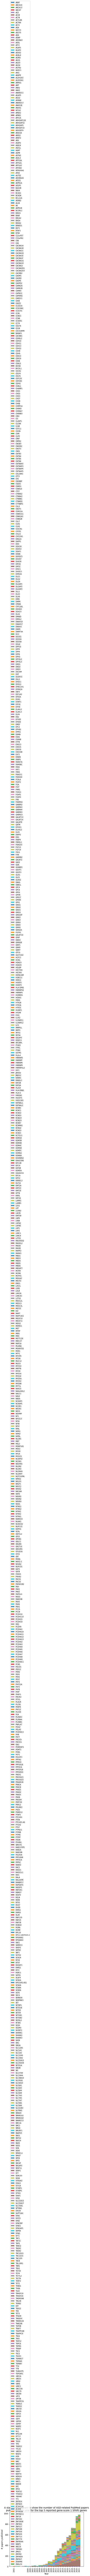

In [113]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(all_dates, range(1993,2023), density=0, histtype="bar", stacked=True, alpha=0.8, label=gene_symbols)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)